In [1]:
%pylab inline
from clawpack.pyclaw import Solution
import os
import pygmt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy

Populating the interactive namespace from numpy and matplotlib


In [3]:
def read_fortq(frame):
    """
    Import fort.q files to get x,y,z data
    """
    fortq = Solution(frame, file_format='ascii')
    patch_dict = {}
    for stateno, state in enumerate(fortq.states):
        patch = state.patch
        this_level = patch.level
        Xc, Yc = state.grid.c_centers
        mask_coarse = np.empty(Xc.shape, dtype=bool)
        mask_coarse.fill(False)
        for stateno_fine, state_fine in enumerate(fortq.states):
            patch_fine = state_fine.patch
            if patch_fine.level != this_level+1:
                continue
            xlower_fine = patch_fine.dimensions[0].lower
            xupper_fine = patch_fine.dimensions[0].upper
            ylower_fine = patch_fine.dimensions[1].lower
            yupper_fine = patch_fine.dimensions[1].upper

            m1 = (Xc > xlower_fine) & (Xc < xupper_fine)
            m2 = (Yc > ylower_fine) & (Yc < yupper_fine)
            mask_coarse = (m1 & m2) | mask_coarse
        
        h = state.q[0,:,:]
        eta = state.q[3,:,:]
        drytol_default = 0.001
        water = numpy.ma.masked_where(h<=drytol_default, eta)
#         idx = np.where((h<=drytol_default) & (h>=-drytol_default))
#         water[idx] = np.nan
        water[mask_coarse == True] = np.nan
#         idx2 = np.where(eta==0)
#         water[idx2] = np.nan
        
        # Save variables to dictionary
        long=Xc[:,0]
        lat = Yc[0]
        patch_dict[stateno] = {"lat": lat, 'long':long, 'eta':eta, 'amr_level':this_level, 'Xc':Xc, 'Yc':Yc, 'water':water}
    return patch_dict, water, h, Xc, Yc, eta

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/cat/.pyenv/versions/anaconda3-5.3.1/envs/gmt-ana/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


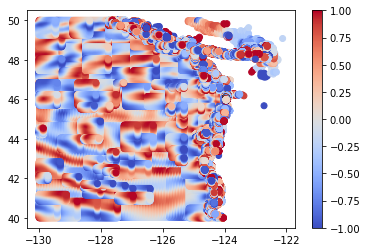

In [45]:
plt.figure()
for key in patch_dict:
    X = patch_dict[key]['Xc']
    Y = patch_dict[key]['Yc']
    water = patch_dict[key]['water']
    
    plt.scatter(X,Y,c=water,  cmap=plt.get_cmap('coolwarm'))
plt.clim(-1.0, 1.0)
plt.colorbar()
plt.show()

In [8]:
# def gmt_map(lat, lon, water):
bathy = '/mnt/c/RData/bathy/entire_world_srtm30.grd'
[patch_dict, water, h, X, Y, eta]=read_fortq(4)
fig = pygmt.Figure()
xlower = -126.0
xupper = -123.0
ylower = 44.0
yupper = 48.0
region = [xlower, xupper, ylower, yupper] # [-90.0, -60.00, 24., 45.]
fig.basemap(region=region, projection='M8i',frame='a')
pygmt.makecpt(series=[-2000, 2000], cmap='wiki-france')
fig.grdimage(bathy,region=region )
pygmt.makecpt(series=[-0.5, 0.5], cmap='polar')
for patch in patch_dict:
    lat = patch_dict[patch]['lat']
    long = patch_dict[patch]['long']
    water = patch_dict[patch]['water']
    if ((min(lat) >=ylower) and (max(lat) <=yupper)):
        if((min(long) >= xlower) and (max(long) <= xupper)):
            df = pd.DataFrame(data=water, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
            df.index.name='Longitude'
            df.columns.name="Latitude"
            da=xr.DataArray(data=df.T)

            fig.grdimage(da, Q=True, t=75)
#     else:
#         continue
fig.colorbar()
fig.show()
### Plot GMT map


# gmt_map(X, Y, water)

grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [ERROR]: Passing max <= zmin prevents automatic CPT generation!
grdimage [ERROR]: Failed to read CPT (null).
grdimage [E

GMTCLibError: Module 'psconvert' failed with status code 78:
psconvert [ERROR]: System call [gs -q -dNOSAFER -dNOPAUSE -dBATCH -sDEVICE=bbox -DPSL_no_pagefill -dMaxBitmap=2147483647 -dUseFastColor=true '/home/cat/.gmt/sessions/gmt6.3174/gmt_5.ps-' 2> '/home/cat/.gmt/sessions/gmt6.3174/psconvert_3174c.bb'] returned error 256.

NameError: name 'mcolors' is not defined

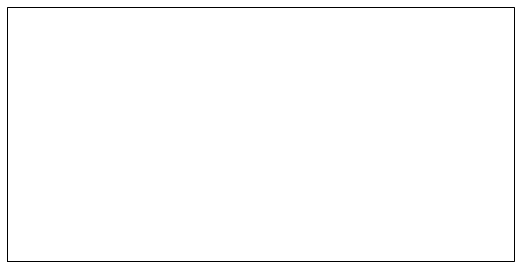

In [16]:
mcolors=matplotlib.
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot(121, projection=ccrs.PlateCarree([-126,-123, 44, 48])) # [-74, -60.00, 20., 44]
img_extent = [-126,-123, 44, 48]
cmap = mcolors.ListedColormap(self.colors, 'colormap')
norm = mcolors.BoundaryNorm(self.cbarLevels, cmap.N, clip=True)
# tiler = MapQuestOpenAerial()
ax.set_extent(img_extent)
ax.coastlines()
# ax.add_feature(cartopy.feature.LAND)
# ax.add_image(tiler)
for patch in patch_dict:
    lat = patch_dict[patch]['lat']
    long = patch_dict[patch]['long']
    water = patch_dict[patch]['water']
    df = pd.DataFrame(data=water, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
    df.index.name='Longitude'
    df.columns.name="Latitude"
    da=xr.DataArray(data=df.T)
    X, Y = np.meshgrid(lat, long)
    ax.contourf(da)


# import numpy as np
# lon = np.linspace(-80, 80, 25)
# lat = np.linspace(30, 70, 25)
# lon2d, lat2d = np.meshgrid(lon, lat)
# data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
# ax.contourf(da, alpha=0.5)
plt.show()

# fig = plt.figure(2)
# plt.pcolor(Xc, Yc, eta, vmin=-0.1, vmax=1.)